In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Loading data

In [17]:
paris_ml = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\04 - Data Cleaning\Paris.csv')

In [18]:
paris_ml.head()

,latitude,longitude,address,datetime,datetimeEpoch,tempmax,tempmin,temp,humidity,precip,...,conditions,description,date,pm25,pm10,o3,no2,so2,co,City
0,48.8572,2.34141,Paris,2014-01-01,1388530800,10.5,6.7,8.4,85.06,1.82,...,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,2014-01-01,43.0,30.0,22.0,42.0,NaN,4.0,Paris
1,48.8572,2.34141,Paris,2014-01-02,1388617200,11.1,8.5,9.9,81.63,4.96,...,Rain,Clear conditions throughout the day with rain ...,2014-01-02,53.0,33.0,22.0,34.0,NaN,2.0,Paris
2,48.8572,2.34141,Paris,2014-01-03,1388703600,13.4,8.5,11.0,76.53,0.14,...,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,2014-01-03,50.0,28.0,23.0,41.0,NaN,3.0,Paris
3,48.8572,2.34141,Paris,2014-01-04,1388790000,12.4,7.6,9.1,80.53,0.67,...,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,2014-01-04,52.0,23.0,19.0,34.0,NaN,3.0,Paris
4,48.8572,2.34141,Paris,2014-01-05,1388876400,8.9,4.6,6.9,82.81,1.25,...,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,2014-01-05,45.0,20.0,20.0,30.0,NaN,3.0,Paris


I will load the clean air pollution for Paris and concatanate it to the df, but first I will drop the columns that I will replace with clean data

In [19]:
paris_ml.columns

Index(['latitude', 'longitude', 'address', 'datetime', 'datetimeEpoch',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'pressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'description', 'date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co',
       'City'],
      dtype='object')

In [20]:
paris_ml.drop(columns=['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co',
       'City'], inplace=True)

In [21]:
paris_clean = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\05 - Time Series\Paris_clean_for_ts.csv')

In [22]:
paris_clean.drop(columns='datetime', inplace=True)

In [23]:
paris_ml = pd.concat([paris_ml,paris_clean], axis=1)


In [24]:
paris_ml.head()

,latitude,longitude,address,datetime,datetimeEpoch,tempmax,tempmin,temp,humidity,precip,...,visibility,solarradiation,solarenergy,uvindex,conditions,description,pm25,pm10,o3,no2
0,48.8572,2.34141,Paris,2014-01-01,1388530800,10.5,6.7,8.4,85.06,1.82,...,24.8,NaN,NaN,0.0,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,43.0,30.0,22.0,42.0
1,48.8572,2.34141,Paris,2014-01-02,1388617200,11.1,8.5,9.9,81.63,4.96,...,24.3,NaN,NaN,0.0,Rain,Clear conditions throughout the day with rain ...,53.0,33.0,22.0,34.0
2,48.8572,2.34141,Paris,2014-01-03,1388703600,13.4,8.5,11.0,76.53,0.14,...,20.4,NaN,NaN,0.0,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,50.0,28.0,23.0,41.0
3,48.8572,2.34141,Paris,2014-01-04,1388790000,12.4,7.6,9.1,80.53,0.67,...,21.6,NaN,NaN,0.0,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,52.0,23.0,19.0,34.0
4,48.8572,2.34141,Paris,2014-01-05,1388876400,8.9,4.6,6.9,82.81,1.25,...,24.0,NaN,NaN,0.0,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,45.0,20.0,20.0,30.0


Dropping columns that diplicate information and that won't be needed for the analysis 

In [25]:
paris_ml.columns

Index(['latitude', 'longitude', 'address', 'datetime', 'datetimeEpoch',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'pressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'description', 'pm25', 'pm10', 'o3', 'no2'],
      dtype='object')

In [26]:
cols_to_drop = ['latitude', 'longitude', 'address', 'datetimeEpoch','description',]

In [27]:
paris_ml.drop(columns=cols_to_drop, inplace=True)

In [28]:
paris_ml.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,snow,snowdepth,windgust,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,pm25,pm10,o3,no2
0,2014-01-01,10.5,6.7,8.4,85.06,1.82,16.67,NaN,1.0,65.2,...,26.7,24.8,NaN,NaN,0.0,"Rain, Partially cloudy",43.0,30.0,22.0,42.0
1,2014-01-02,11.1,8.5,9.9,81.63,4.96,20.83,NaN,1.0,60.2,...,19.7,24.3,NaN,NaN,0.0,Rain,53.0,33.0,22.0,34.0
2,2014-01-03,13.4,8.5,11.0,76.53,0.14,4.17,NaN,1.0,64.0,...,20.1,20.4,NaN,NaN,0.0,"Rain, Partially cloudy",50.0,28.0,23.0,41.0
3,2014-01-04,12.4,7.6,9.1,80.53,0.67,8.33,NaN,1.0,45.7,...,22.2,21.6,NaN,NaN,0.0,"Rain, Partially cloudy",52.0,23.0,19.0,34.0
4,2014-01-05,8.9,4.6,6.9,82.81,1.25,12.50,NaN,NaN,52.5,...,22.8,24.0,NaN,NaN,0.0,"Rain, Partially cloudy",45.0,20.0,20.0,30.0


Missing values

In [34]:
paris_ml.shape

(2922, 22)

In [29]:
paris_ml.isna().sum()

datetime             0
tempmax              0
tempmin              0
temp                 0
humidity             0
precip               1
precipcover          1
snow              2922
snowdepth         2722
windgust             1
windspeed            0
pressure             1
cloudcover           1
visibility           0
solarradiation    1826
solarenergy       1826
uvindex              0
conditions           0
pm25                 0
pm10                 0
o3                   0
no2                  0
dtype: int64

In [ ]:
'''The columns with mmost missing values are: solarrradiation, solarenergy, snow, snowdepth.
As these columns are given in paris I would assume that they are highly correlated and at leat 2 of them can be droped, but to better understand the data I will look at both of them.
I decided to drop them as these columns have missing values for more than a half records.'''

In [40]:
cols_to_drop = ['snow', 'snowdepth','solarradiation', 'solarenergy']
paris_ml.drop(columns=cols_to_drop, inplace=True)

In [41]:
paris_ml.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windgust,windspeed,pressure,cloudcover,visibility,uvindex,conditions,pm25,pm10,o3,no2
0,2014-01-01,10.5,6.7,8.4,85.06,1.82,16.67,65.2,28.9,1006.1,26.7,24.8,0.0,"Rain, Partially cloudy",43.0,30.0,22.0,42.0
1,2014-01-02,11.1,8.5,9.9,81.63,4.96,20.83,60.2,29.2,1001.7,19.7,24.3,0.0,Rain,53.0,33.0,22.0,34.0
2,2014-01-03,13.4,8.5,11.0,76.53,0.14,4.17,64.0,29.2,1006.0,20.1,20.4,0.0,"Rain, Partially cloudy",50.0,28.0,23.0,41.0
3,2014-01-04,12.4,7.6,9.1,80.53,0.67,8.33,45.7,21.5,1001.5,22.2,21.6,0.0,"Rain, Partially cloudy",52.0,23.0,19.0,34.0
4,2014-01-05,8.9,4.6,6.9,82.81,1.25,12.50,52.5,22.8,1007.5,22.8,24.0,0.0,"Rain, Partially cloudy",45.0,20.0,20.0,30.0


In [42]:
paris_ml.isna().sum()

datetime       0
tempmax        0
tempmin        0
temp           0
humidity       0
precip         1
precipcover    1
windgust       1
windspeed      0
pressure       1
cloudcover     1
visibility     0
uvindex        0
conditions     0
pm25           0
pm10           0
o3             0
no2            0
dtype: int64

I start by checking missing values on precipitation

In [45]:
paris_ml.loc[paris_ml.precip.isna()]

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windgust,windspeed,pressure,cloudcover,visibility,uvindex,conditions,pm25,pm10,o3,no2
2607,2021-02-20,17.9,8.0,12.5,67.7,NaN,NaN,34.2,24.8,1010.7,56.1,11.2,4.0,Partially cloudy,55.0,16.0,26.0,13.0


In [48]:
#It seems that there was no percipiatation that day as conditions say paritally cloudly, so I can fill the values of precip and precipcover with 0
paris_ml.loc[paris_ml.precip.isna()] = paris_ml.loc[paris_ml.precip.isna()].fillna(0)

In [49]:
paris_ml.isna().sum()

datetime       0
tempmax        0
tempmin        0
temp           0
humidity       0
precip         0
precipcover    0
windgust       1
windspeed      0
pressure       1
cloudcover     1
visibility     0
uvindex        0
conditions     0
pm25           0
pm10           0
o3             0
no2            0
dtype: int64

Now I will look at windgust 

In [51]:
paris_ml.loc[paris_ml.windgust.isna()]

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windgust,windspeed,pressure,cloudcover,visibility,uvindex,conditions,pm25,pm10,o3,no2
2599,2021-02-12,0.6,-4.0,-2.2,58.86,0.0,0.0,NaN,29.8,NaN,NaN,10.0,3.0,Clear,64.0,25.0,25.0,30.0


In [ ]:
# In fact wind gust (max speed is highly correlated to the wind speed so I can just drop this column istead of wondering how to fill that value)

In [53]:
paris_ml.drop(columns='windgust', inplace=True)

In [54]:
paris_ml.isna().sum()

datetime       0
tempmax        0
tempmin        0
temp           0
humidity       0
precip         0
precipcover    0
windspeed      0
pressure       1
cloudcover     1
visibility     0
uvindex        0
conditions     0
pm25           0
pm10           0
o3             0
no2            0
dtype: int64

Let's look at pressure

In [55]:
paris_ml.loc[paris_ml.pressure.isna()]

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,visibility,uvindex,conditions,pm25,pm10,o3,no2
2599,2021-02-12,0.6,-4.0,-2.2,58.86,0.0,0.0,29.8,NaN,NaN,10.0,3.0,Clear,64.0,25.0,25.0,30.0


In [58]:
paris_ml.loc[[2598,2599,2600]]

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,visibility,uvindex,conditions,pm25,pm10,o3,no2
2598,2021-02-11,-0.1,-6.1,-2.9,69.30,0.0,0.0,36.0,1022.5,25.0,10.4,4.0,Partially cloudy,98.0,37.0,23.0,34.0
2599,2021-02-12,0.6,-4.0,-2.2,58.86,0.0,0.0,29.8,NaN,NaN,10.0,3.0,Clear,64.0,25.0,25.0,30.0
2600,2021-02-13,0.1,-6.1,-2.9,52.99,0.0,0.0,23.0,1033.5,9.7,16.8,4.0,Clear,59.0,22.0,23.0,19.0


In [ ]:
#I can assume that the pressure on that day was not that diffreent as the day after as they have the same conditions, so I will fill these values with the values for the day after 

In [60]:
paris_ml=paris_ml.fillna(method='bfill')

In [61]:
paris_ml.loc[[2598,2599,2600]]

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,visibility,uvindex,conditions,pm25,pm10,o3,no2
2598,2021-02-11,-0.1,-6.1,-2.9,69.30,0.0,0.0,36.0,1022.5,25.0,10.4,4.0,Partially cloudy,98.0,37.0,23.0,34.0
2599,2021-02-12,0.6,-4.0,-2.2,58.86,0.0,0.0,29.8,1033.5,9.7,10.0,3.0,Clear,64.0,25.0,25.0,30.0
2600,2021-02-13,0.1,-6.1,-2.9,52.99,0.0,0.0,23.0,1033.5,9.7,16.8,4.0,Clear,59.0,22.0,23.0,19.0


### Converting datetime into datetime format

In [63]:
paris_ml.datetime= pd.to_datetime(paris_ml.datetime)

In [64]:
paris_ml.dtypes

datetime       datetime64[ns]
tempmax               float64
tempmin               float64
temp                  float64
humidity              float64
precip                float64
precipcover           float64
windspeed             float64
pressure              float64
cloudcover            float64
visibility            float64
uvindex               float64
conditions             object
pm25                  float64
pm10                  float64
o3                    float64
no2                   float64
dtype: object

#### Encoding conditions

In [65]:
paris_ml.conditions.value_counts()

Clear                     990
Rain, Partially cloudy    952
Rain                      751
Partially cloudy          217
Snow, Partially cloudy     11
Rain, Overcast              1
Name: conditions, dtype: int64

In [67]:
paris_ml.conditions.unique()

array(['Rain, Partially cloudy', 'Rain', 'Partially cloudy', 'Clear',
       'Snow, Partially cloudy', 'Rain, Overcast'], dtype=object)

In [68]:
event_list = ['Clear', 'Partially cloudy', 'Rain', 'Snow', 'Overcast']

# I am creating empty columns that will be populated with values if that event happend that day 
for event in event_list:
	paris_ml[event]=0

for event in event_list:
	paris_ml[event] = paris_ml['conditions'].str.contains(event).astype(int)



In [69]:
paris_ml.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,...,conditions,pm25,pm10,o3,no2,Clear,Partially cloudy,Rain,Snow,Overcast
0,2014-01-01,10.5,6.7,8.4,85.06,1.82,16.67,28.9,1006.1,26.7,...,"Rain, Partially cloudy",43.0,30.0,22.0,42.0,0,1,1,0,0
1,2014-01-02,11.1,8.5,9.9,81.63,4.96,20.83,29.2,1001.7,19.7,...,Rain,53.0,33.0,22.0,34.0,0,0,1,0,0
2,2014-01-03,13.4,8.5,11.0,76.53,0.14,4.17,29.2,1006.0,20.1,...,"Rain, Partially cloudy",50.0,28.0,23.0,41.0,0,1,1,0,0
3,2014-01-04,12.4,7.6,9.1,80.53,0.67,8.33,21.5,1001.5,22.2,...,"Rain, Partially cloudy",52.0,23.0,19.0,34.0,0,1,1,0,0
4,2014-01-05,8.9,4.6,6.9,82.81,1.25,12.50,22.8,1007.5,22.8,...,"Rain, Partially cloudy",45.0,20.0,20.0,30.0,0,1,1,0,0


In [71]:
#Now I can drop coditions column
paris_ml.drop(columns='conditions', inplace=True)

#### Extracting month and day information

In [75]:
#As in the model I don't need the exact day only the information about the month and day of the week, as these propabbly influence air pollution eg. higher pollution for winter months, lower pollution during weekends etc

paris_ml['month']=paris_ml.datetime.dt.month
paris_ml['day_of_week'] = paris_ml.datetime.dt.dayofweek


In [77]:
#Now I can drop datetime column
paris_ml.drop(columns='datetime', inplace=True)

### Correlation between columns

<AxesSubplot:>

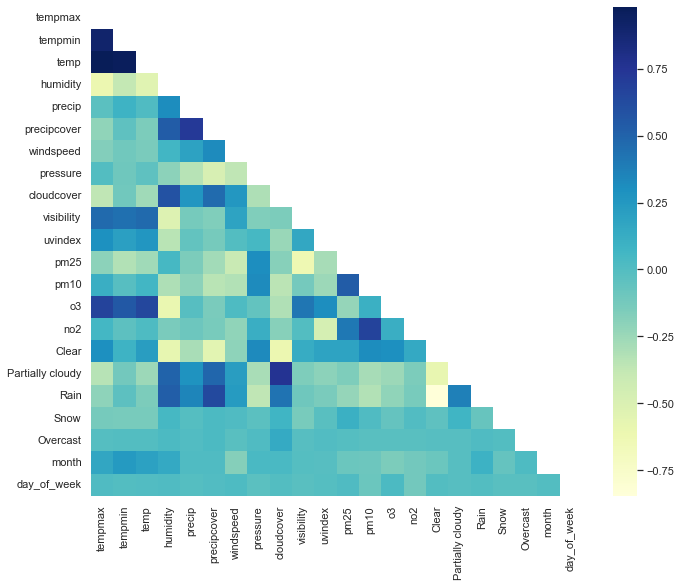

In [81]:
# I will drow correlation matrix as well as see values in the Table 
sns.set_theme(style="whitegrid")
# Compute the correlation matrix
corr = paris_ml.corr()
f, ax = plt.subplots(figsize=(11, 9))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = 'YlGnBu'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap)

In [82]:
corr

,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,visibility,...,pm10,o3,no2,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week
tempmax,1.000000,0.906268,0.981934,-0.607853,-0.026350,-0.215296,-0.171001,-0.000768,-0.365606,0.470824,...,0.115401,0.670881,0.058488,0.298325,-0.338448,-2.070837e-01,-0.128908,-0.006277,0.161357,1.268898e-02
tempmin,0.906268,1.000000,0.964138,-0.377490,0.081912,-0.042097,-0.104070,-0.102921,-0.107342,0.439660,...,-0.014136,0.560169,-0.036531,0.085348,-0.113512,-3.356525e-02,-0.137876,0.000624,0.245580,1.338959e-03
temp,0.981934,0.964138,1.000000,-0.536448,0.011417,-0.153123,-0.141594,-0.040602,-0.264683,0.474633,...,0.064246,0.647726,0.021730,0.223984,-0.249645,-1.482964e-01,-0.133972,-0.001889,0.198828,5.906358e-03
humidity,-0.607853,-0.377490,-0.536448,1.000000,0.316510,0.533096,0.061672,-0.199473,0.588037,-0.520212,...,-0.304003,-0.600843,-0.145370,-0.575379,0.498449,5.237049e-01,0.051832,0.029671,0.146356,1.654096e-02
precip,-0.026350,0.081912,0.011417,0.316510,1.000000,0.720776,0.193937,-0.336365,0.263663,-0.128319,...,-0.200154,-0.016577,-0.092020,-0.296366,0.283825,3.475160e-01,-0.005220,0.006090,0.014709,-7.029033e-03
precipcover,-0.215296,-0.042097,-0.153123,0.533096,0.720776,1.000000,0.322276,-0.483296,0.463381,-0.166747,...,-0.341247,-0.139876,-0.132668,-0.546926,0.485756,6.361671e-01,0.031844,0.029353,0.015042,7.659814e-03
windspeed,-0.171001,-0.104070,-0.141594,0.061672,0.193937,0.322276,1.000000,-0.361666,0.253470,0.188713,...,-0.318186,0.020343,-0.218085,-0.205752,0.219628,2.324357e-01,0.011115,-0.023607,-0.177125,2.043255e-02
pressure,-0.000768,-0.102921,-0.040602,-0.199473,-0.336365,-0.483296,-0.361666,1.000000,-0.304442,-0.161645,...,0.323179,-0.054560,0.111044,0.325537,-0.291892,-3.666654e-01,-0.026157,0.017596,0.038124,-2.944525e-02
cloudcover,-0.365606,-0.107342,-0.264683,0.588037,0.263663,0.463381,0.253470,-0.304442,1.000000,-0.152358,...,-0.348699,-0.315870,-0.183914,-0.607677,0.753999,4.284084e-01,0.072715,0.140659,0.037516,-1.008051e-03
visibility,0.470824,0.439660,0.474633,-0.520212,-0.128319,-0.166747,0.188713,-0.161645,-0.152358,1.000000,...,-0.120537,0.413155,0.000736,0.131804,-0.159298,-1.007112e-01,-0.137856,-0.013355,-0.008080,-1.937136e-02


In [83]:
#There are a lot of columns that are highly correlated I will deal with them one by one.
# I can drop tempmax and tempmin as they are highly correlated to temp
# I can drop as well precipcover as it is correlated to precip

cols_to_drop = ['tempmax', 'tempmin', 'precipcover']
paris_ml.drop(columns=cols_to_drop, inplace=True)


In [84]:
#Now I look at the correlation matrix again
paris_ml.corr()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,pm25,pm10,o3,no2,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week
temp,1.000000,-0.536448,0.011417,-0.141594,-0.040602,-0.264683,0.474633,0.264137,-0.263085,0.064246,0.647726,0.021730,0.223984,-0.249645,-1.482964e-01,-0.133972,-0.001889,0.198828,5.906358e-03
humidity,-0.536448,1.000000,0.316510,0.061672,-0.199473,0.588037,-0.520212,-0.341646,0.052022,-0.304003,-0.600843,-0.145370,-0.575379,0.498449,5.237049e-01,0.051832,0.029671,0.146356,1.654096e-02
precip,0.011417,0.316510,1.000000,0.193937,-0.336365,0.263663,-0.128319,-0.055118,-0.153583,-0.200154,-0.016577,-0.092020,-0.296366,0.283825,3.475160e-01,-0.005220,0.006090,0.014709,-7.029033e-03
windspeed,-0.141594,0.061672,0.193937,1.000000,-0.361666,0.253470,0.188713,0.001673,-0.400341,-0.318186,0.020343,-0.218085,-0.205752,0.219628,2.324357e-01,0.011115,-0.023607,-0.177125,2.043255e-02
pressure,-0.040602,-0.199473,-0.336365,-0.361666,1.000000,-0.304442,-0.161645,0.048871,0.307568,0.323179,-0.054560,0.111044,0.325537,-0.291892,-3.666654e-01,-0.026157,0.017596,0.038124,-2.944525e-02
cloudcover,-0.264683,0.588037,0.263663,0.253470,-0.304442,1.000000,-0.152358,-0.242008,-0.189296,-0.348699,-0.315870,-0.183914,-0.607677,0.753999,4.284084e-01,0.072715,0.140659,0.037516,-1.008051e-03
visibility,0.474633,-0.520212,-0.128319,0.188713,-0.161645,-0.152358,1.000000,0.159178,-0.625761,-0.120537,0.413155,0.000736,0.131804,-0.159298,-1.007112e-01,-0.137856,-0.013355,-0.008080,-1.937136e-02
uvindex,0.264137,-0.341646,-0.055118,0.001673,0.048871,-0.242008,0.159178,1.000000,-0.284420,-0.247520,0.305827,-0.473040,0.185310,-0.198416,-1.400668e-01,-0.023984,0.003364,-0.011493,-8.280028e-03
pm25,-0.263085,0.052022,-0.153583,-0.400341,0.307568,-0.189296,-0.625761,-0.284420,1.000000,0.532436,-0.229680,0.407801,0.188911,-0.160264,-2.283360e-01,0.104651,-0.006442,-0.089104,1.617107e-02
pm10,0.064246,-0.304003,-0.200154,-0.318186,0.323179,-0.348699,-0.120537,-0.247520,0.532436,1.000000,0.110273,0.669083,0.315080,-0.286774,-3.247145e-01,0.013979,-0.022225,-0.093308,-8.490317e-02


<AxesSubplot:>

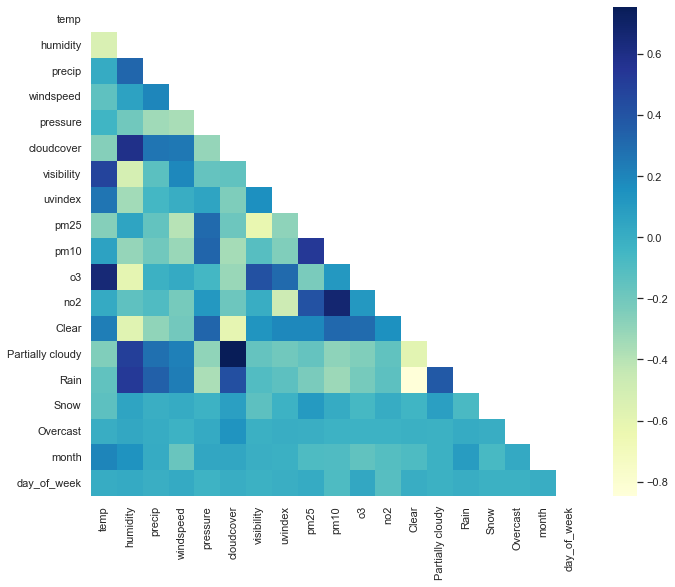

In [85]:
sns.set_theme(style="whitegrid")
# Compute the correlation matrix
corr = paris_ml.corr()
f, ax = plt.subplots(figsize=(11, 9))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = 'YlGnBu'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap)

In [ ]:
# I can leave rest of the columns like that as there is no correlation exceeding 90%